Anne Louise Seekford (bng3be@virginia.edu) DS 5001 Spring 2023

# Metadata

```{yaml}
Course:   DS 5001 Exploratory Text Analytics
Topic:    Final Report
Author:   Anne Louise Seekford
Email:    bng3be@virginia.edu
Date:     Spring 2023
```

# 1. Introduction


**Background**

Fragrances have a long history of being associated with wealth and luxury. From ancient Egypt to the Renaissance period, perfumes were used as a form of artistic expression and a way to display one's status. It wasn't until the 16th century that perfumes truly became a luxury item, as perfumers began using more exotic and expensive ingredients, making their fragrances even more exclusive and coveted. The French monarchy became famous for its love of perfume, with a famous quote expressing "perfume is the soul of the flower." 

While perfume production techniques have improved and fragrances have generally become more accessible to the general public due to "bargain brands", certain high-end perfume houses continue to maintain an aura of exclusivity. This has contributed to the perception of perfumes as a luxury item, reserved for those who can afford to indulge in the finest scents, or to at least appear affluent. 

However, the rise of social media platforms like TikTok and Instagram has changed the game, allowing for trends to cycle at lightning speed. This has made it challenging for low-income populations to keep up with the latest fashion, specifically fragrance in this case, fads. The democratization of information has the potential to inspire positive change and promote inclusivity in the beauty industry, but it also highlights the stark disparities in wealth and access to luxury goods.

**Project Goals**

This exploratory text analysis project aims to use language models to find more affordable yet comparable substitutes for expensive, luxury perfumes. This project seeks to identify which perfume notes are associated with better ratings and higher prices. By doing so, I intend to provide an alternative option for those who love the scent of a particular luxury perfume but cannot afford its price tag. 

Additionally, the project aims to gain insight into the characteristics that make a perfume more desirable and expensive - ultimately shedding light on the factors that influence consumer preferences and market trends in the fragrance industry. 

By achieving these goals, the results from this project could help increase accessibility and inclusivity in the world of perfume while also providing valuable insights for industry professionals and social media influencers.

# 2. Source Data


**Provenance**

The data used in this project comes from the website https://fragrantica.com. This site provides a surplus of information regarding perfumes and colognes, including: fragrance name and designer, image, main accords, top notes, middle notes, base notes, rating (1-5 stars), sillage, longevity, price value, gender. 
Following many failed attempts at scraping the website myself, I used the results from @sir-omoreno on GitHub, who had created a java program to scrape the site [1]. 

Noted on his @sir-omoreno's GitHub:
*"We initially created web-scraping code to gather all perfumes from the fragrantica.com website. However, on the main search page when the "see more results" button was clicked, the page maxed out at 1,000 perfumes, despite having over 60,000 perfumes on record. We rewrote our code to scrape the data by year in a effort to gather as many perfumes as possible, presuming that no more than 1000 perfumes would have been developed in any one year (from the 1920s through 2020). If more than 1,000 perfumes were produced in a single year, the then those extra perfumes would not be reflected in our database. Additionally, due to other web scraping limitations, we were able to scrape a total of 517 perfumes during the project timeframe. We also scraped all available perfume notes, for a total of 1,012"*

**Location**

The dataset, `perfume_data_combined.csv`, can be downloaded from [my GitHub repository](https://github.com/alseekford/fragrance_reviews).


**Description**

The dataset contains in total 478 unique fragrances by 158 unique brands. A snippet of the original dataset is shown below.
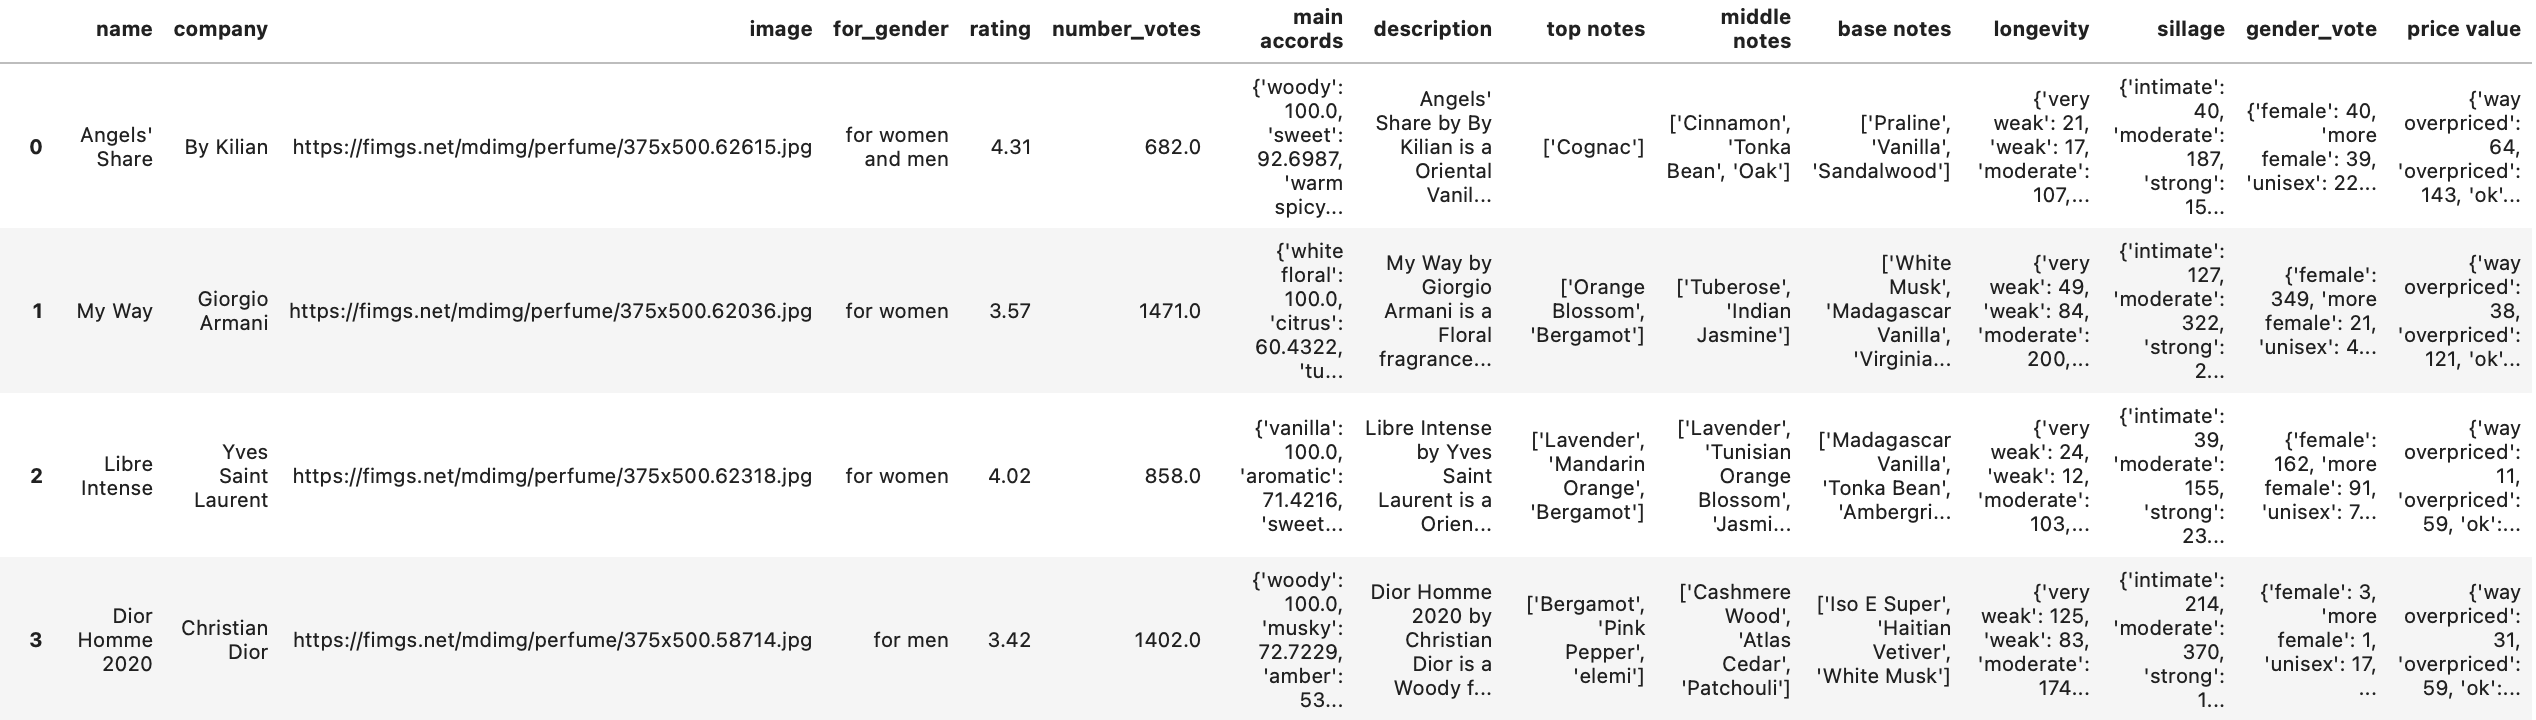
The columns `main_accords`, `longevity`, `sillage`, `gender_vote`, and `price_value` were all multi-nested in a dictionary for each observation.
I used two different variations of "documents" in this case: one using the `description` of the fragrance (roughly 50 words/row), and another using the `notes`, which aggregated the `top notes`, `middle notes` and `base notes` columns (roughly 15 words/row). 

**Format**

All files are in .csv format. All .csv files can be located in [my GitHub repository](https://github.com/alseekford/fragrance_reviews).

# 3. Data Model


**Data Cleaning** 

I began by separating the data by gender using the `for_gender` column - i.e. classifying as a perfume or cologne. The women’s fragrance data frame consisted of 251 perfumes by 104 distinct designers. The male’s fragrance data frame consisted of 113 colognes by only 54 different brands. Following the separation of dataframes, I dropped the nested dictionary columns for this analysis. Next, I removed bizarre characters, like square brackets and quotations from `top notes`, `middle notes`, and `base notes`. The creation of LIB.csv, CORPUS.csv, and VOCAB.csv came next.

**LIB**

Three LIB tables were created - one for fragrances classified as “for women”, “for men”, and “for men and women”. They include: `company`, `name`, `rating`, and `number_votes`. A snippet of the women’s fragrance LIB is shown below.

<div style="text-align:center">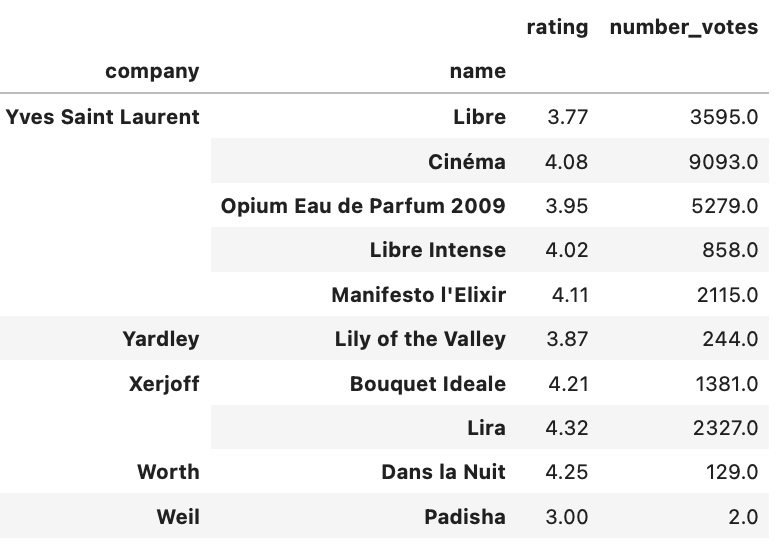

<div style="text-align:center"> Figure 1: Women's Fragrance LIB Table

<br/><br/>

**CORPUS**

In the same manner that LIB was separated into categories, the CORPUS tables were divided. Two separate subcategory of CORPUS’s were made: one for the perfume/cologne notes, and one for the description of the fragrance. A snippet of the women’s fragrance notes CORPUS, in addition to the men’s fragrance description CORPUS is shown below. Six CORPUS tables were created in total.
    
<div style="text-align:center">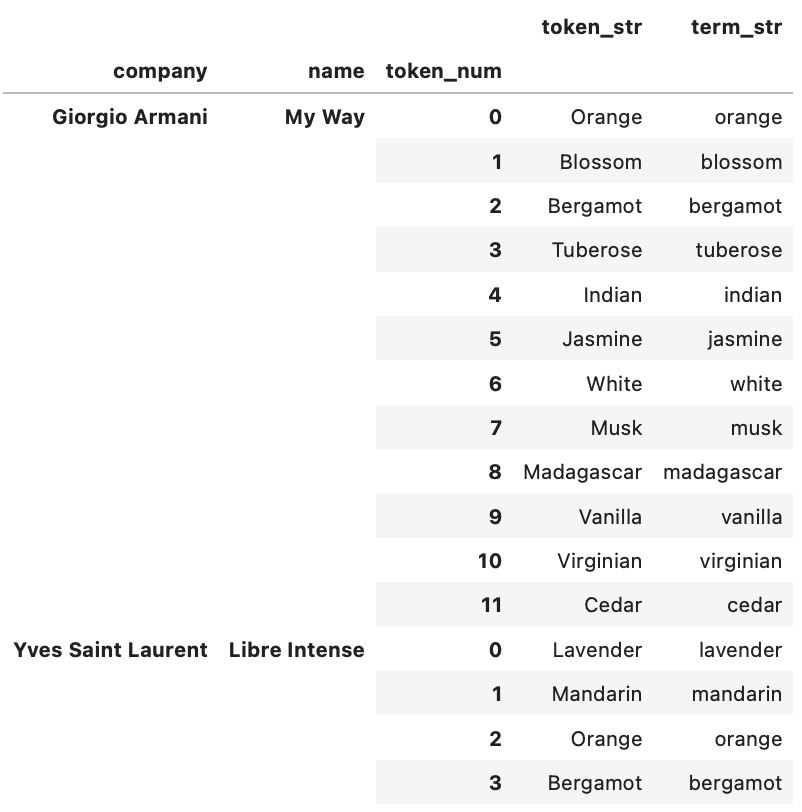 
    
<div style="text-align:center"> Figure 2: Women's Fragrance Notes CORPUS Table
<br/><br/>    
    
    
<div style="text-align:center">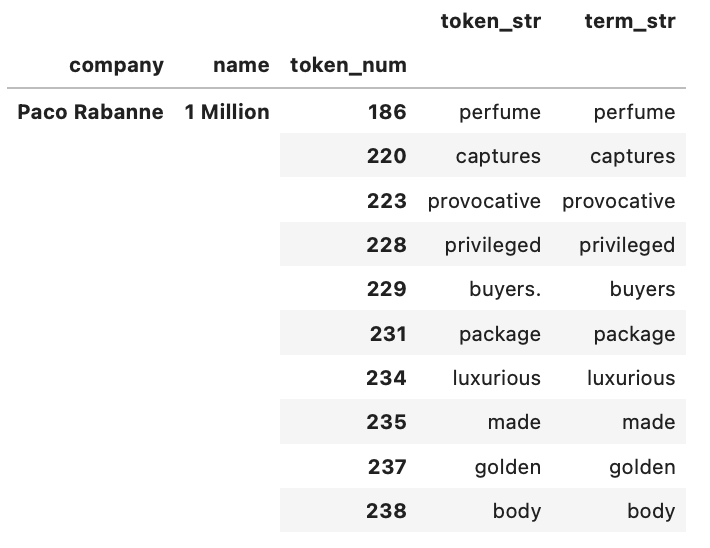 
    
<div style="text-align:center"> Figure 3: Men's Fragrance Description CORPUS Table
<br/><br/>
    
Next, the TFIDF values were calculated for each CORPUS. However, the CORPUS’s Bag of Words were additionally separated by various OHCO: by *brand*, i.e. designer or *scent*, i.e. perfume/cologne name. Figure 4 shows the TFIDF table for women’s fragrance notes, bagged by the *brand*. 
    
<div style="text-align:center">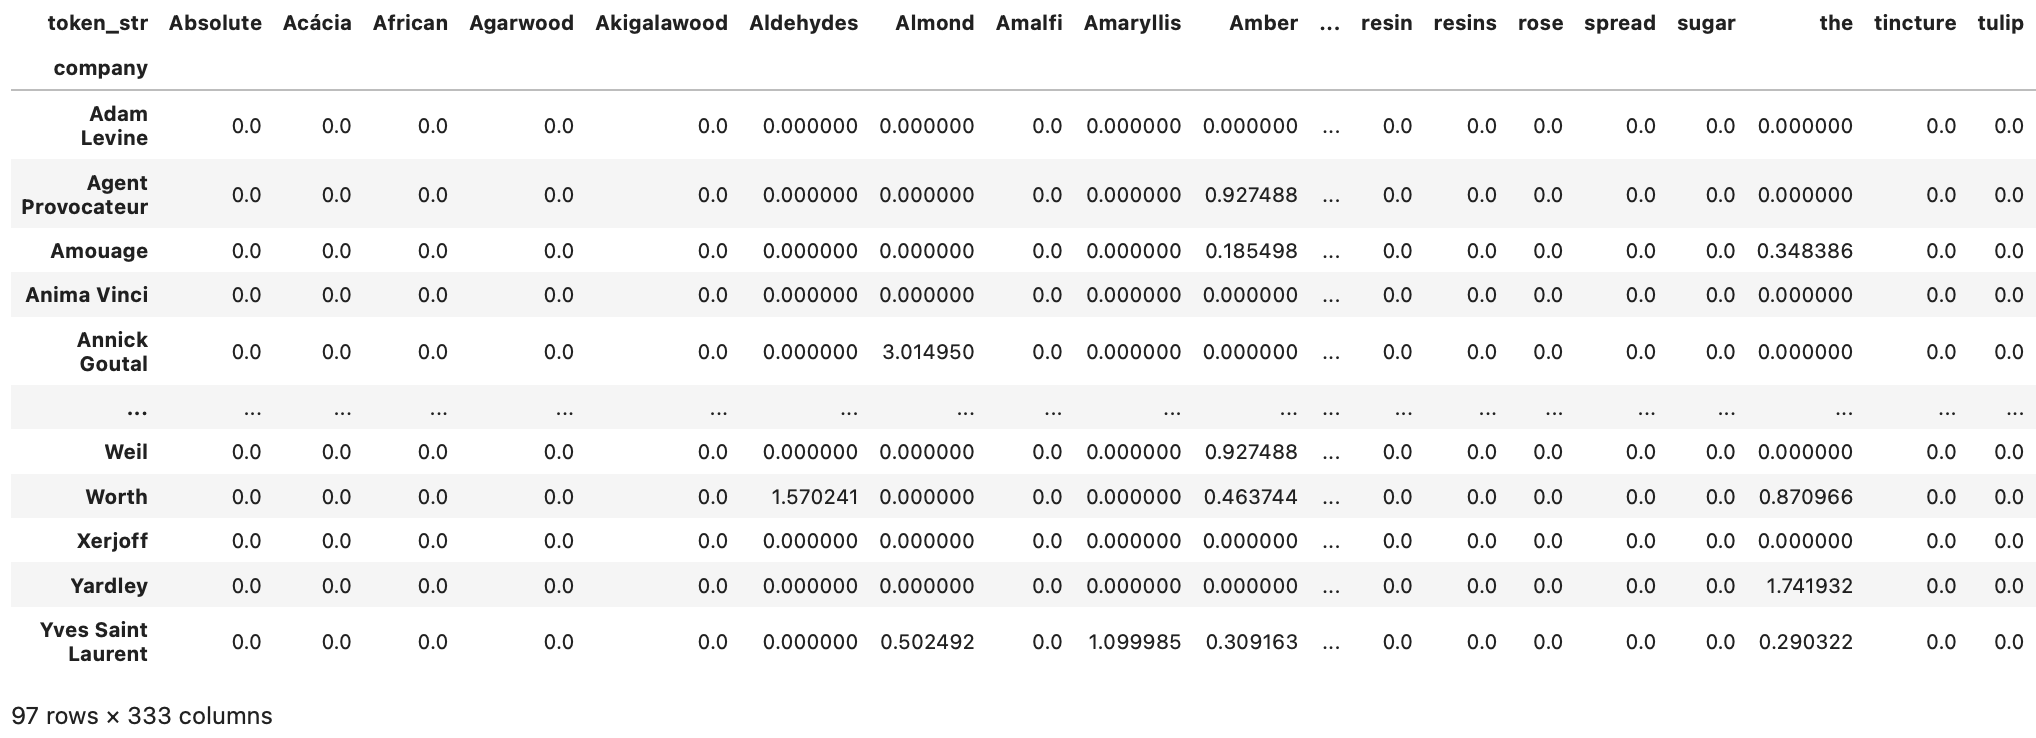 
    
<div style="text-align:center"> Figure 4: Women's TFIDF Fragrance Notes
<br/><br/>    
    
Figure 5 shows the average TFIDF values for men’s fragrances notes, also bagged by the *brand*. Twelve distinct Bag of Words were created.

<br/><br/>    
<div style="text-align:center">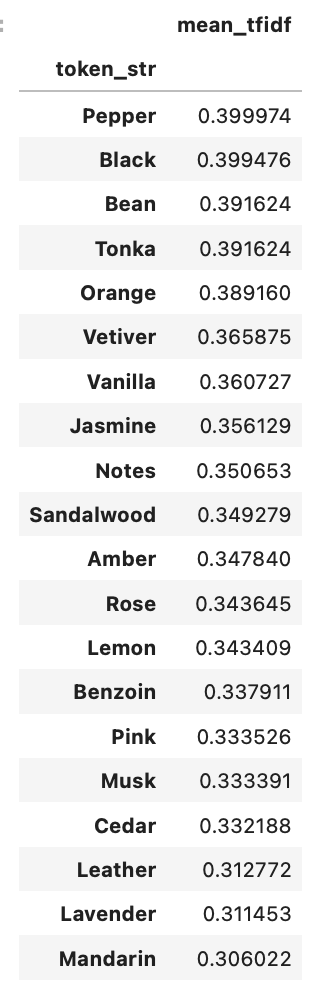 
    
<div style="text-align:center"> Figure 5: Men's Mean TFIDF Fragrance Notes

    
    
**VOCAB**

Following the TFIDF calculations, the six vocabulary tables were built. Men’s, women’s and men’s and women’s fragrances tables were manufactured for both the notes and descriptions. An example of the women’s fragrance notes vocabulary is shown below. It is important to note that I did not include part of speech tagging in this instance because they were all adjectives. 
    
<div style="text-align:center">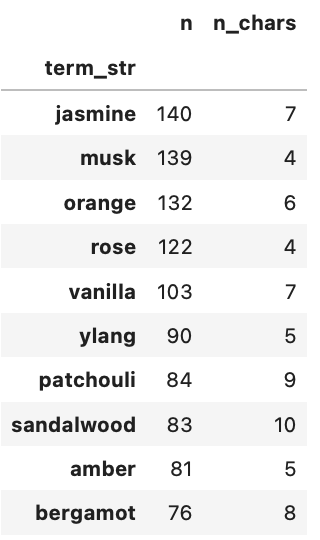 
    
<div style="text-align:center"> Figure 6: Women's Fragrance Notes VOCAB Table
<br/><br/>    

**Principal Components (PCA)**

The first analysis method I performed was PCA. I began by obtaining the top 100 notes for each brand. It was interesting to explore the eigenvector pairs. Here are the eigenvector pairs for men’s fragrance notes. 
    
<div style="text-align:center">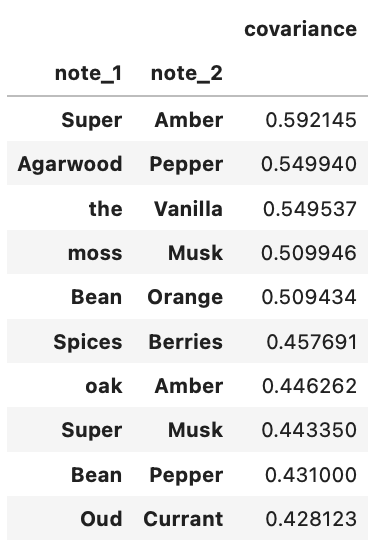 
    
<div style="text-align:center"> Figure 7: Eigen Pairs for Men's Fragrance Notes
<br/><br/>    
    
This was followed by receiving the top 5 components for both mens and womens fragrances, as shown in Figure 8. This dataframe exhibits the components merged with the women’s designers and fragrances themselves (the women’s LIB table). 
    
<br/><br/>     
<div style="text-align:center">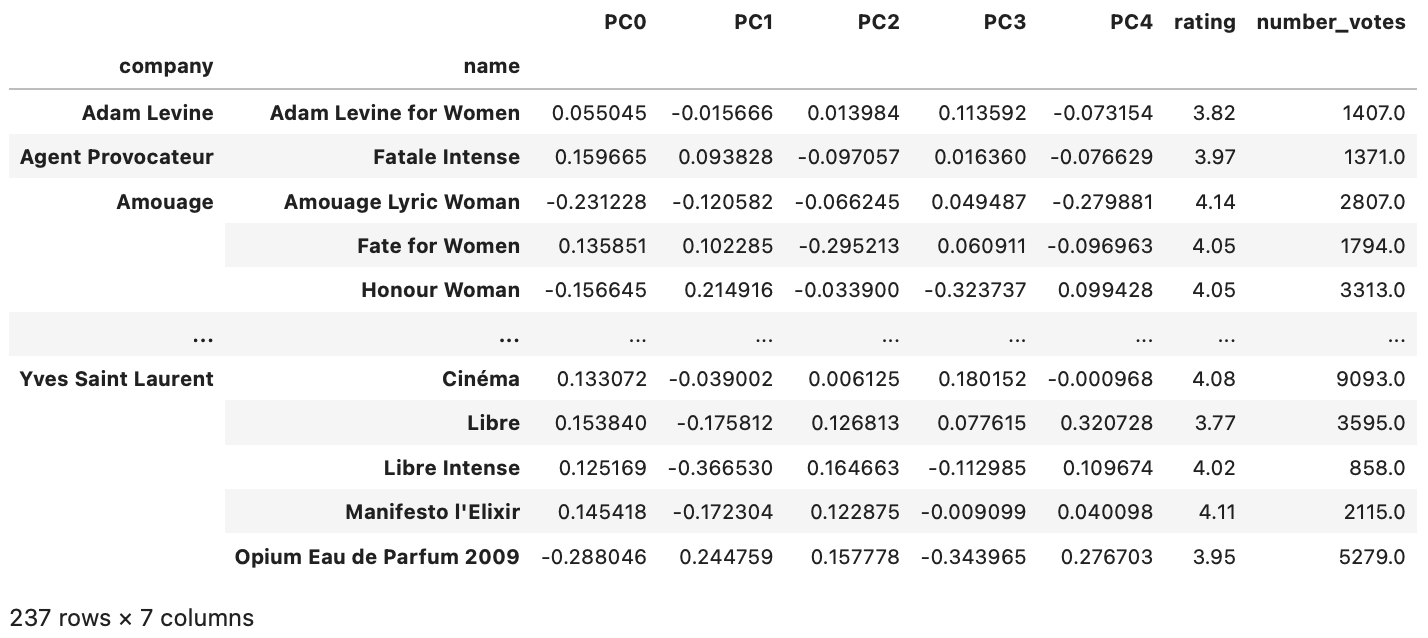 
    
<div style="text-align:center"> Figure 8: Women's Top 5 Components  
<br/><br/>    
    
    
<div style="text-align:center">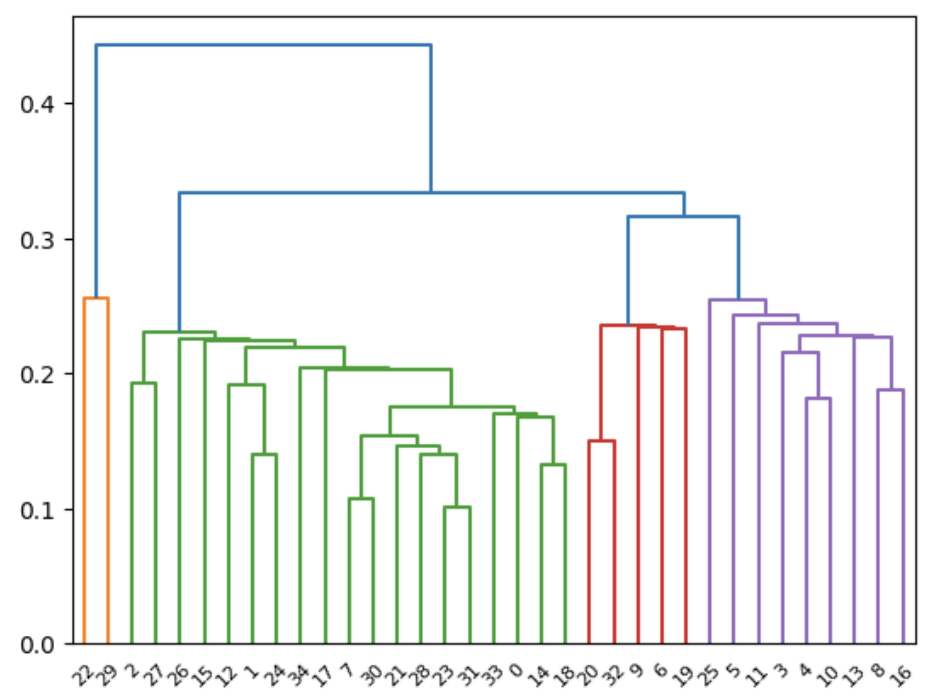 
    
<div style="text-align:center"> Figure 9: "High" Ranked Perfume Dendrogram    
<br/><br/>    
    
    
This was followed by classifying women’s fragrances by “high” ($\>$4.2 stars) and “low” ($\<$3.5 stars) ratings and plotting a dendrogram. This dendrogram explains the highly ranked perfumes. 
    


**Topic Models (LDA)**

Four topic models were created in total. 1. Fragrance notes, by brand, and 2. Descriptions, by brand, one each for both women and men fragrances. In the notes topic models, five components were returned, each with six words. The men’s notes topic model data frame is seen below. 

<div style="text-align:center">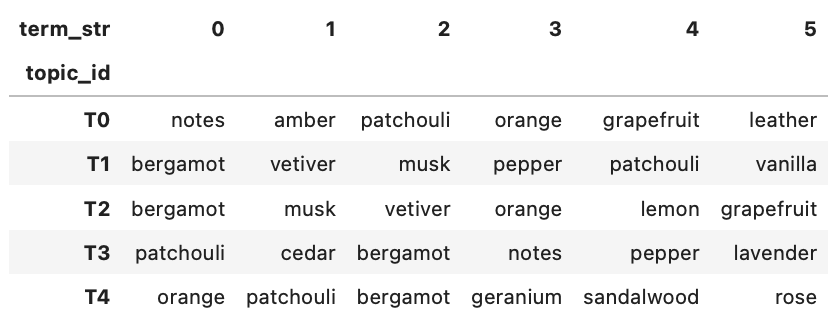 
    
<div style="text-align:center"> Figure 10: Men's Notes Topic Model
<br/><br/>    
    
<div style="text-align:left"> For the descriptions topic models, ten components were returned, each with twelve words. Below shows the women’s topics of descriptions (Figure 11), in addition to the top ten brands that associated with topic “T02” (Figure 12).
    

<div style="text-align:center">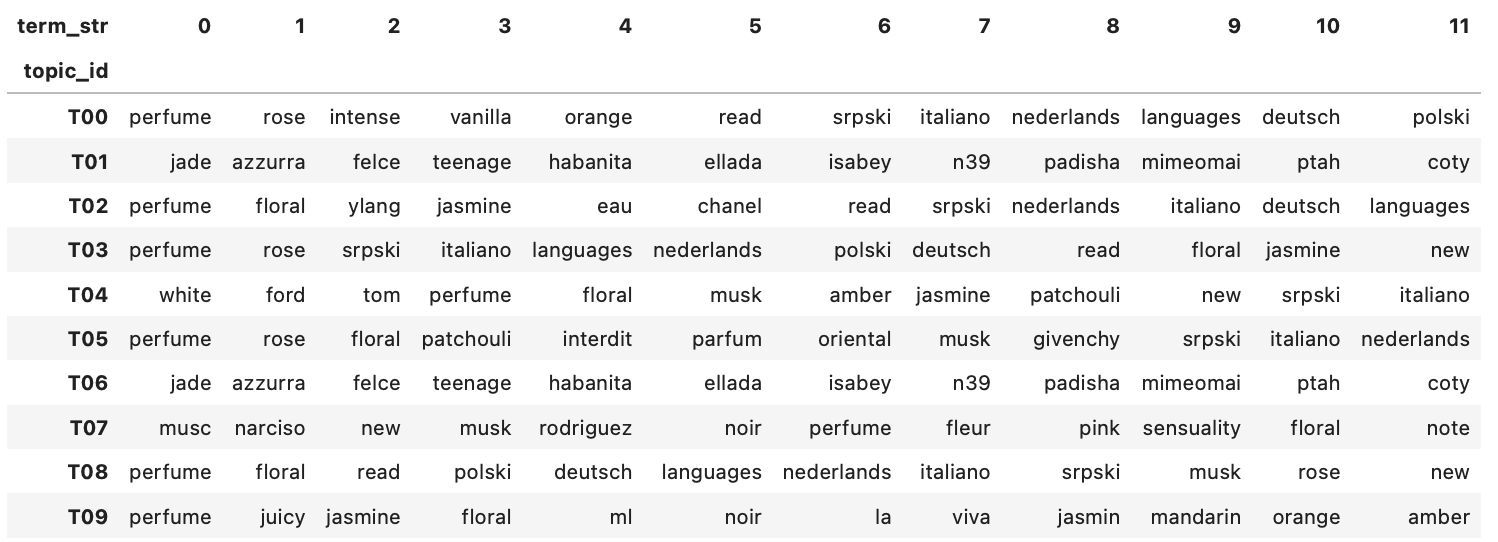 
    
<div style="text-align:center"> Figure 11: Women's Perfume Description Topics
<br/><br/>    
    
<div style="text-align:center">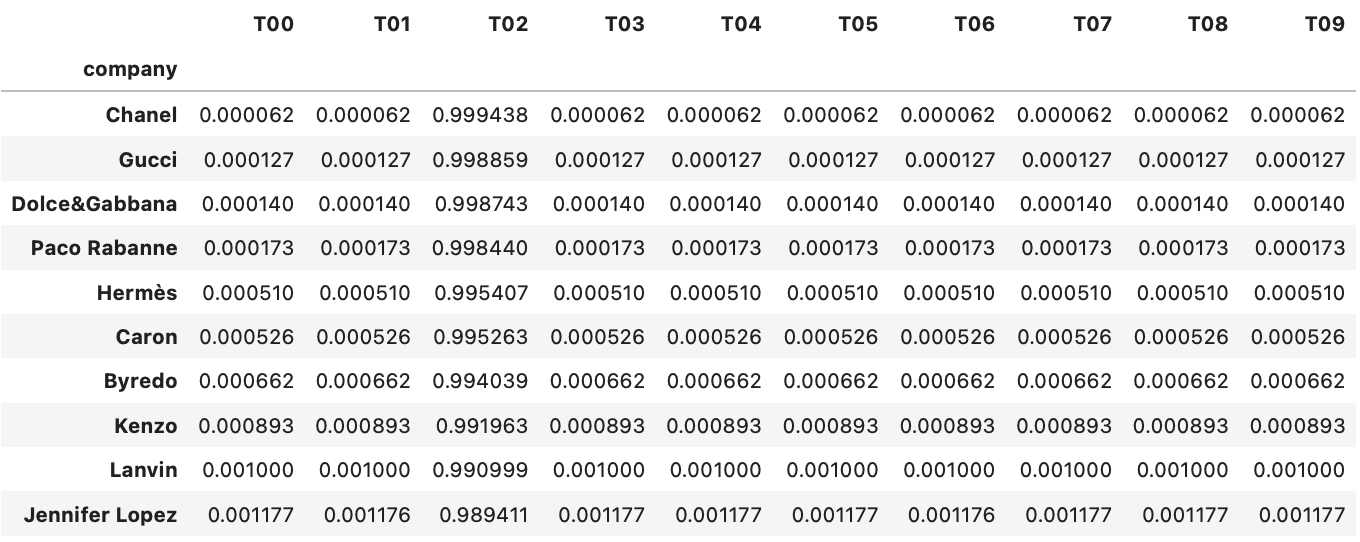 
    
<div style="text-align:center"> Figure 12: Top Ten Brands

# 4. Exploration


**Rating Analysis**

A perfume's rating, represented by a number of stars, is often an indicator of its popularity and appeal to consumers. By analyzing these ratings, one can extract a list of top-rated perfumes that are considered the "best" by consumers. With this list of highly rated fragrances in hand, other analysis tools can be employed to identify which perfume notes and ingredients contribute to their success. In specific, the analysis tools specified above - PCA, LDA, and topic modeling. Once these key features have been identified, it is possible to find similar perfumes that are not as pricey. By leveraging these analysis tools and techniques, it is possible to identify affordable yet comparable alternatives to high-end perfumes, making luxurious scents more accessible to a wider range of consumers.

I began the rating analysis by visualizing the fragrances with the highest ratings, that had over 150 reviews. This is beneficial because it provides a more representative sample size of consumer preferences. This ensures that the analysis is based on a statistically significant number of reviews, reducing the risk of skewed or biased results that could be caused by a small sample size.

<div style="text-align:center">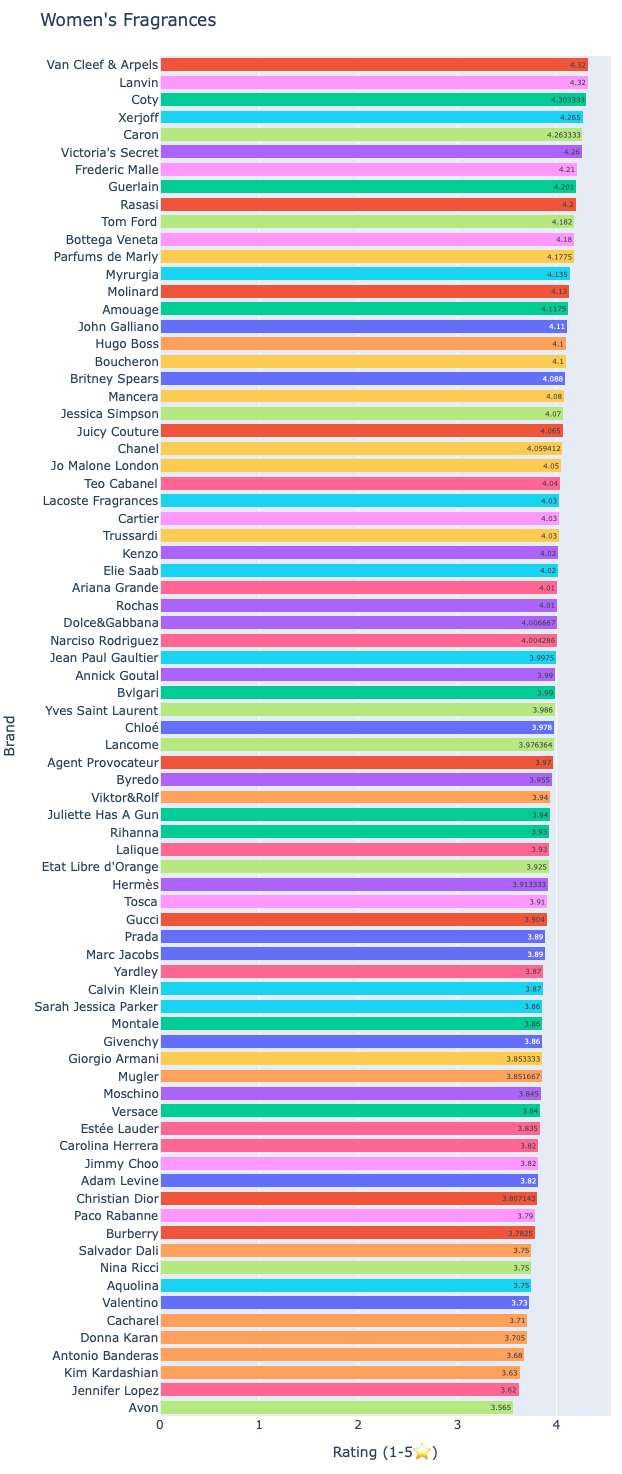 
    
<div style="text-align:center"> Figure 13: Top Women's Fragrance Ratings
<br/><br/>      
    
<div style="text-align:center">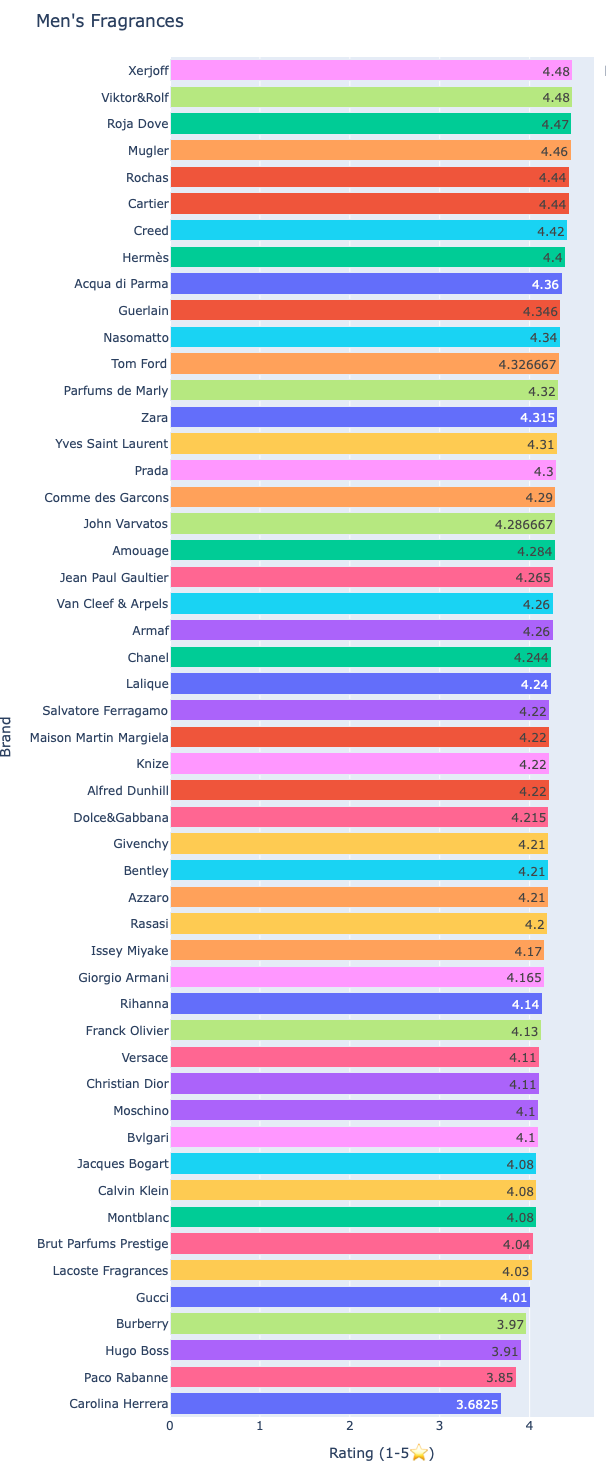 
    
<div style="text-align:center"> Figure 14: Top Men's Fragrance Ratings   
<br/><br/>     
    
    
<div style="text-align:left">As we can see the brands Xerjoff and Guerlain are in the Top 10 for both men and women. Knowing this information, we can use it to our advantage and delve further into our pair analyses' and topic model analyses specific to these highly ranked brands. 
   

# 5. Interpretation

Provide your interpretation of the results of exploration, and any conclusion if you are comfortable making them.

In just one example of this analysis, we could say we wanted to find a substitution for both the #1 ranked mens and womens cologne and perfume, respectively. 
Through the topic model approach (LDA) we can find brands that are similar to both of these. 

First, let's take our #1 ranked men's cologne brand: Xerjoff. Xerjoff ranked extremely highly in topic model 8. Shown in Figure 15 are other fragrance brands that also ranked highly in topic 8. 

<div style="text-align:center">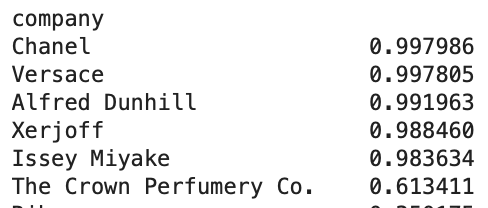 
    
<div style="text-align:center"> Figure 15: Top Men's Fragrance Potential Similarities   
<br/><br/>  
    
<div style="text-align:left"> Alfred Dunhill is a good alternative for Xerjoff, at a more reasonable price. 
    
    
Next, let's take our #1 ranked women's perfume brand: Van Cleef $\&$ Arpels. Van Cleef $\&$ Arpels ranked extremely highly in topic 7. Shown in Figure 16 are other fragrance brands that also ranked highly in topic 7. 

<div style="text-align:center">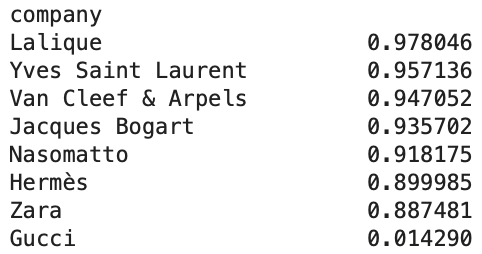 
    
<div style="text-align:center"> Figure 16: Top Women's Fragrance Potential Similarities   
<br/><br/> 
    
<div style="text-align:left"> In the case of women's perfume, it seems Zara may be a good alternative if you are looking to smell like you came straight out of Van Cleef, without spending nearly as much. 
    
These are just two examples of potential "dupes" for these luxury fragrances. With the models created, you can examine any brand, or specific perfume/cologne and find a similar, cheaper version.

By analyzing the notes and descriptions of highly ranked fragrances, it becomes possible to identify the key characteristics that make them popular and desirable to consumers. Armed with this knowledge, it is then possible to identify other fragrances that share similar notes and descriptions but are more economically sensible. This approach allows consumers to enjoy scents that they love, without having to pay exorbitant prices for luxury fragrances. Additionally, it can help promote inclusivity in the fragrance industry by providing a wider range of options for consumers with different budgets. Overall, this approach leverages the power of data and analysis to make luxury fragrances more accessible and inclusive, without compromising on quality or appeal.    

# 6. References

[1] https://github.com/sir-omoreno/perfume_designer_app#data-processing